# PCA for Images

### The [Olivetti Faces Dataset](https://scikit-learn.org/stable/datasets/real_world.html?highlight=olivetti+faces) from `scikit-learn`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn import datasets
from sklearn.decomposition import PCA

In [3]:
# Download the data
faces = datasets.fetch_olivetti_faces()['data']

In [4]:
# 1. Standardize the images using the mean and standard deviation
faces_mean = faces.mean(axis=0)
faces_std = faces.std(axis=0)
faces_standardised = (faces - faces_mean) / faces_std

Each row from the faces dataset is a flattened image. Each feature is a pixel in the image.

In [5]:
# Find the side length of a square image
n_images, n_features = faces_standardised.shape
side_length = int(np.sqrt(n_features))
print(f'Number of features(pixels) per image: {n_features}')
print(f'Square image side length: {side_length}')

Number of features(pixels) per image: 4096
Square image side length: 64


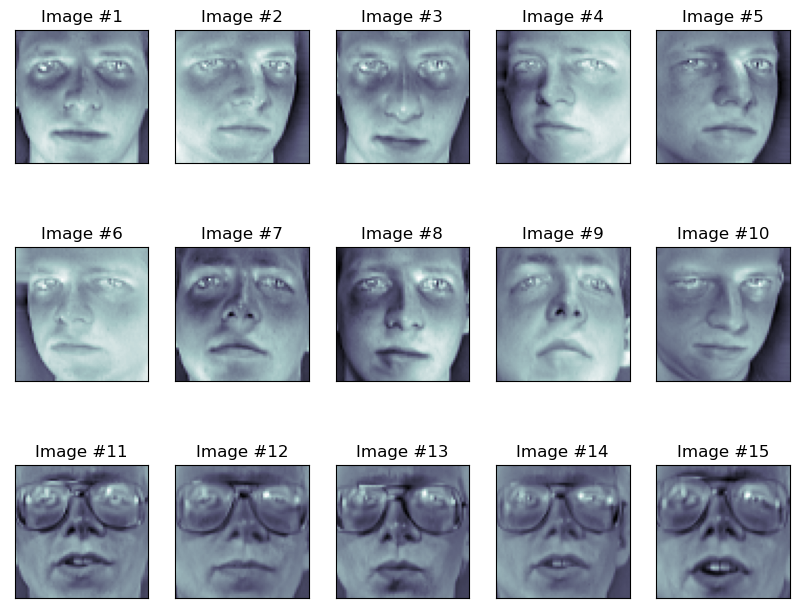

In [6]:
# Create an empty 10x8 plot
fig = plt.figure(figsize=(10, 8))

# Observe the first 15 images.
for i in range(15):

    # Create subplot, remove x and y ticks, and add title
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Image #{i+1}')

    # Get an image from a row based on the current value of i
    face_image = faces_standardised[i]

    # Reshape this image into side_length x side_length
    face_image_reshaped = face_image.reshape(side_length, side_length)

    # Show the image
    ax.imshow(face_image_reshaped, cmap=plt.cm.bone)
plt.show()

----

### Visualise the eigenvectors as `Eigenfaces`

In [7]:
faces_standardized = pd.read_csv('faces_standardized.csv').values

1. Instantiate a PCA object and fit the standardized faces dataset

In [8]:
pca = PCA(n_components=400) # Reducing components will reduce detail and clarity
pca.fit(faces_standardized)

PCA(n_components=400)

2. Retrieve and plot eigenvectors (eigenfaces)

In [9]:
eigenfaces = pca.components_

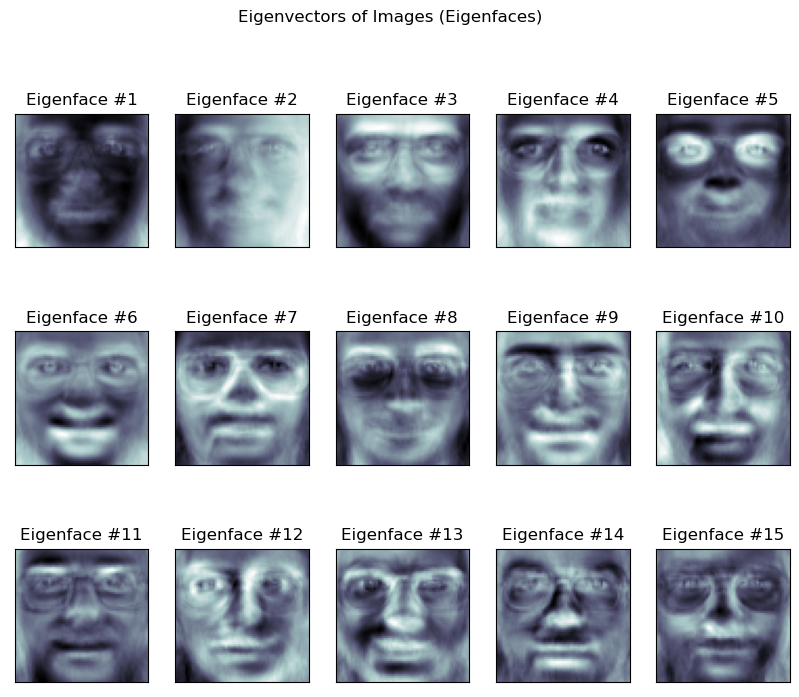

In [10]:
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Eigenvectors of Images (Eigenfaces)')
for i in range(15):
    # Create subplot, remove x and y ticks, and add title
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Eigenface #{i+1}')

    # Get an eigenvector from the current value of i
    eigenface = eigenfaces[i]

    # Reshape this image into 64x64 since the flattened shape was 4096
    eigenface_reshaped = eigenface.reshape(64, 64)

    # Show the image
    ax.imshow(eigenface_reshaped, cmap=plt.cm.bone)

plt.show()

3. Reconstruct images from the compressed principal components

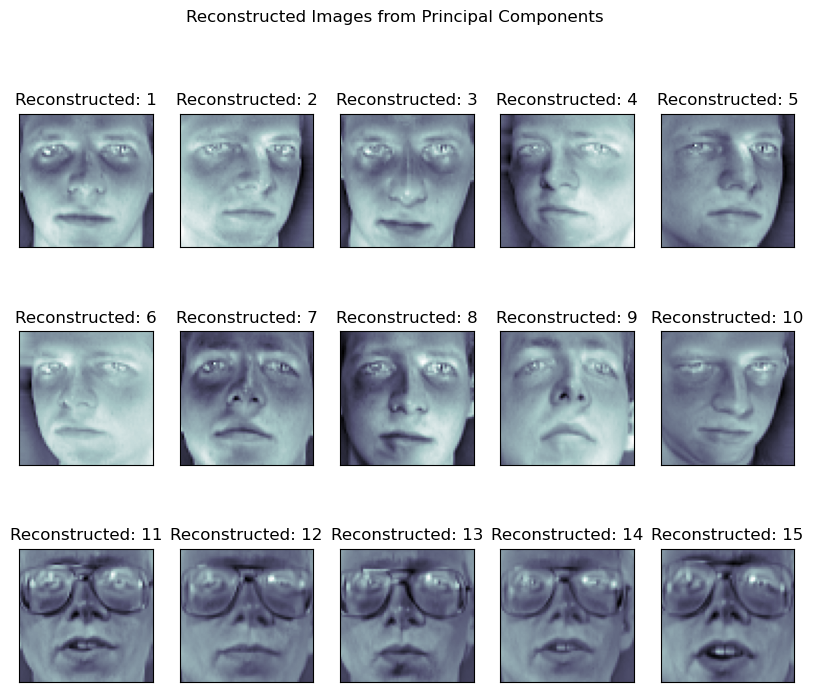

In [11]:
# The principal components are usually calculated using `faces_standardized @ principal_axes` or the `.transform` method
principal_components = pca.transform(faces_standardized)

# The `inverse_transform` method allows for reconstruction of images in the original size
faces_reconstructed = pca.inverse_transform(principal_components)

# Plot the reconstructed images
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Reconstructed Images from Principal Components')
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Reconstructed: {i+1}')

    reconstructed_face = faces_reconstructed[i]
    reconstructed_face_reshaped = reconstructed_face.reshape(64, 64)
    ax.imshow(reconstructed_face_reshaped, cmap=plt.cm.bone)
plt.show()